Voltage Prediction Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y = df['average_voltage']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the MLPRegressor model with best hyperparameters and early stopping
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

print(f'Number of iterations: {model.n_iter_}')



Mean Absolute Error: 0.11
Mean Squared Error: 0.04
Root Mean Squared Error: 0.20
R^2 Score: 0.97
Number of iterations: 2227


Combined Voltage and capacity prediction

In [ ]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y = df[['average_voltage', 'capacity_grav']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Defining the MLPRegressor model with best hyperparameters and early stopping
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# The y_pred will now be a 2D array with predictions for both 'average_voltage' and 'capacity_grav'
y_pred_voltage = y_pred[:, 0]
y_pred_capacity_grav = y_pred[:, 1]

# Similarly, split the y_test
y_test_voltage = y_test['average_voltage']
y_test_capacity_grav = y_test['capacity_grav']

# Evaluating the performance of the model for 'average_voltage'
mae_voltage = mean_absolute_error(y_test_voltage, y_pred_voltage)
mse_voltage = mean_squared_error(y_test_voltage, y_pred_voltage)
rmse_voltage = mean_squared_error(y_test_voltage, y_pred_voltage, squared=False)
r2_voltage = r2_score(y_test_voltage, y_pred_voltage)

print(f'For average_voltage:')
print(f'Mean Absolute Error: {mae_voltage:.2f}')
print(f'Mean Squared Error: {mse_voltage:.2f}')
print(f'Root Mean Squared Error: {rmse_voltage:.2f}')
print(f'R^2 Score: {r2_voltage:.2f}')

# Evaluating the performance of the model for 'capacity_grav'
mae_capacity_grav = mean_absolute_error(y_test_capacity_grav, y_pred_capacity_grav)
mse_capacity_grav = mean_squared_error(y_test_capacity_grav, y_pred_capacity_grav)
rmse_capacity_grav = mean_squared_error(y_test_capacity_grav, y_pred_capacity_grav, squared=False)
r2_capacity_grav = r2_score(y_test_capacity_grav, y_pred_capacity_grav)

print(f'\nFor capacity_grav:')
print(f'Mean Absolute Error: {mae_capacity_grav:.2f}')
print(f'Mean Squared Error: {mse_capacity_grav:.2f}')
print(f'Root Mean Squared Error: {rmse_capacity_grav:.2f}')
print(f'R^2 Score: {r2_capacity_grav:.2f}')

print(f'Number of iterations: {model.n_iter_}')


For average_voltage:
Mean Absolute Error: 0.77
Mean Squared Error: 1.03
Root Mean Squared Error: 1.01
R^2 Score: 0.10

For capacity_grav:
Mean Absolute Error: 11.00
Mean Squared Error: 436.60
Root Mean Squared Error: 20.89
R^2 Score: 0.91
Number of iterations: 3594


Separate Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[['fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y1 = df[['average_voltage']]
y2 = df[['capacity_grav']]

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Standardizing the input features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Standardizing the targets
scaler_y1 = StandardScaler()
y1_train = scaler_y1.fit_transform(y1_train)
y1_test = scaler_y1.transform(y1_test)

scaler_y2 = StandardScaler()
y2_train = scaler_y2.fit_transform(y2_train)
y2_test = scaler_y2.transform(y2_test)

# Defining the MLPRegressor model with best hyperparameters and early stopping
model_1 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)
model_2 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Training the model
model_1.fit(X_train, y1_train)
model_2.fit(X_train, y2_train)

# Making predictions on the testing data
y1_pred = model_1.predict(X_test)
y2_pred = model_2.predict(X_test)

# Inverse transform the predictions
y1_pred = scaler_y1.inverse_transform(y1_pred.reshape(-1, 1))
y2_pred = scaler_y2.inverse_transform(y2_pred.reshape(-1, 1))

# Evaluating the performance of the model
mae1 = mean_absolute_error(y1_test, y1_pred)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
r21 = r2_score(y1_test, y1_pred)

mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)
r22 = r2_score(y2_test, y2_pred)

print(f'For average_voltage:')
print(f'Mean Absolute Error: {mae1:.2f}')
print(f'Mean Squared Error: {mse1:.2f}')
print(f'Root Mean Squared Error: {rmse1:.2f}')
print(f'R^2 Score: {r21:.2f}')

print(f'For capacity_grav:')
print(f'Mean Absolute Error: {mae2:.2f}')
print(f'Mean Squared Error: {mse2:.2f}')
print(f'Root Mean Squared Error: {rmse2:.2f}')
print(f'R^2 Score: {r22:.2f}')

print(f'Number of iterations for model_1: {model_1.n_iter_}')
print(f'Number of iterations for model_2: {model_2.n_iter_}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For average_voltage:
Mean Absolute Error: 3.49
Mean Squared Error: 12.28
Root Mean Squared Error: 3.50
R^2 Score: -15.25
For capacity_grav:
Mean Absolute Error: 134.04
Mean Squared Error: 22750.64
Root Mean Squared Error: 150.83
R^2 Score: -30818.31
Number of iterations for model_1: 1548
Number of iterations for model_2: 820


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(10,), (14, 7), (28,14), (30,15,7)],
    'alpha': [0.01, 0.001, 0.0001],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Define the scoring function (R2 score) to use for the grid search
scoring = {'R2': 'r2', 'MAE': make_scorer(mean_absolute_error, greater_is_better=False)}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    MLPRegressor(random_state=42, activation='relu', max_iter=4000, solver='adam', early_stopping=True, validation_fraction=0.2, n_iter_no_change=20),
    param_grid,
    scoring=scoring,
    refit='R2', # because we want to refit the best model found based on the R2 score
    cv=5,
    n_jobs=-1
)

# Perform the grid search on the first model
grid_search.fit(X_train, y1_train)
best_model_1 = grid_search.best_estimator_
print("Best parameters for model 1:", grid_search.best_params_)

# Perform the grid search on the second model
grid_search.fit(X_train, y2_train)
best_model_2 = grid_search.best_estimator_
print("Best parameters for model 2:", grid_search.best_params_)



Best parameters for model 1: {'alpha': 0.001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
Best parameters for model 2: {'alpha': 0.0001, 'hidden_layer_sizes': (14, 7), 'learning_rate_init': 0.1}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (14,7), (100,), (10, 10), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
}

# Create two GridSearchCV objects for two MLPRegressor models
grid_search_1 = GridSearchCV(MLPRegressor(random_state=42, activation='relu', solver='lbfgs', max_iter=4000, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_2 = GridSearchCV(MLPRegressor(random_state=42, activation='relu', solver='lbfgs', max_iter=4000, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True), param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the models and find the best parameters
grid_search_1.fit(X_train, y1_train)
grid_search_2.fit(X_train, y2_train)

# Get the best parameters
best_params_1 = grid_search_1.best_params_
best_params_2 = grid_search_2.best_params_

# Get the best score
best_score_1 = grid_search_1.best_score_
best_score_2 = grid_search_2.best_score_

print(f'Best parameters for model 1: {best_params_1}')
print(f'Best parameters for model 2: {best_params_2}')

print(f'Best score for model 1: {-best_score_1}')  # multiply by -1 to convert negative MSE to positive
print(f'Best score for model 2: {-best_score_2}')  # multiply by -1 to convert negative MSE to positive


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

Best parameters for model 1: {'alpha': 0.1, 'hidden_layer_sizes': (10,)}
Best parameters for model 2: {'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}
Best score for model 1: 0.04727702349203997
Best score for model 2: 0.038393812687964796


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')

# Splitting the dataset into input features and target variables
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y1 = df['average_voltage']
y2 = df['capacity_grav']

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the MLPRegressor models with the best hyperparameters
model_1 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)
model_2 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(14, 7), max_iter=16000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.1, n_iter_no_change=20, verbose=True)

# Training the models
model_1.fit(X_train, y1_train)
model_2.fit(X_train, y2_train)

# Making predictions on the testing data
y1_pred = model_1.predict(X_test)
y2_pred = model_2.predict(X_test)

# Evaluating the performance of the models
mae1 = mean_absolute_error(y1_test, y1_pred)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
r21 = r2_score(y1_test, y1_pred)

mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)
r22 = r2_score(y2_test, y2_pred)

print('For average_voltage:')
print(f'Mean Absolute Error: {mae1:.2f}')
print(f'Mean Squared Error: {mse1:.2f}')
print(f'Root Mean Squared Error: {rmse1:.2f}')
print(f'R^2 Score: {r21:.2f}')
print(f'Number of iterations for model 1: {model_1.n_iter_}')

print('\nFor capacity_grav:')
print(f'Mean Absolute Error: {mae2:.2f}')
print(f'Mean Squared Error: {mse2:.2f}')
print(f'Root Mean Squared Error: {rmse2:.2f}')
print(f'R^2 Score: {r22:.2f}')
print(f'Number of iterations for model 2: {model_2.n_iter_}')



For average_voltage:
Mean Absolute Error: 0.11
Mean Squared Error: 0.04
Root Mean Squared Error: 0.20
R^2 Score: 0.97
Number of iterations for model 1: 2227

For capacity_grav:
Mean Absolute Error: 7.11
Mean Squared Error: 273.17
Root Mean Squared Error: 16.53
R^2 Score: 0.94
Number of iterations for model 2: 6798


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(14, 7), (10, 5), (20, 10)],
    'alpha': [0.01, 0.001, 0.0001],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [4000],
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [10, 20]
}

# Define the scorer
scorer = {'r2_score': make_scorer(r2_score)}

# Perform the grid search
grid_search = GridSearchCV(model, param_grid, scoring=scorer, refit='r2_score', cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)


Streaming output truncated to the last 5000 lines.
Iteration 540, loss = 89.53772306
Validation score: 0.942138
Iteration 541, loss = 89.35761983
Validation score: 0.942292
Iteration 542, loss = 89.20218448
Validation score: 0.942385
Iteration 543, loss = 89.18604578
Validation score: 0.942594
Iteration 544, loss = 88.73671795
Validation score: 0.942379
Iteration 545, loss = 88.50978858
Validation score: 0.942476
Iteration 546, loss = 88.38118179
Validation score: 0.942546
Iteration 547, loss = 88.14821197
Validation score: 0.942330
Iteration 548, loss = 87.97285148
Validation score: 0.942512
Iteration 549, loss = 87.70036940
Validation score: 0.942955
Iteration 550, loss = 87.59529893
Validation score: 0.943192
Iteration 551, loss = 87.28661232
Validation score: 0.943236
Iteration 552, loss = 87.18022919
Validation score: 0.943164
Iteration 553, loss = 87.13375352
Validation score: 0.942974
Iteration 554, loss = 86.81552001
Validation score: 0.943115
Iteration 555, loss = 86.51632151


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define the parameter space
param_space = {
    'hidden_layer_sizes': [(50, 50), (100,), (50, 50, 50), (100, 100)],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.1, 0.01, 0.001],
    'max_iter': [4000, 8000, 16000],
}

# Define the scoring function
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a MLPRegressor object
mlp = MLPRegressor(random_state=42, activation='relu', early_stopping=True, validation_fraction=0.2, n_iter_no_change=20, verbose=True)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(mlp, param_distributions=param_space, n_iter=20, scoring=scorer, n_jobs=-1, cv=3, random_state=42)

# Fit to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'solver': 'lbfgs', 'max_iter': 16000, 'hidden_layer_sizes': (100, 100), 'alpha': 0.1}
Best score: -124.12022583966514


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Separate Tuned Model

In [ ]:
def evaluate_model(y_test, y_pred, target, model):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"\nFor {target}:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print(f"Number of iterations: {model.n_iter_}")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y1 = df['average_voltage']
y2 = df['capacity_grav']

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the MLPRegressor models with best hyperparameters
model_1 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20)
model_2 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(14,7), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20)

# Training the models
model_1.fit(X_train, y1_train)
model_2.fit(X_train, y2_train)

# Making predictions on the testing data
y1_pred = model_1.predict(X_test)
y2_pred = model_2.predict(X_test)

# Evaluating the performance of the models
evaluate_model(y1_test, y1_pred, "average_voltage", model_1)
evaluate_model(y2_test, y2_pred, "capacity_grav", model_2)



For average_voltage:
Mean Absolute Error: 0.11
Mean Squared Error: 0.04
Root Mean Squared Error: 0.20
R^2 Score: 0.97
Number of iterations: 2227

For capacity_grav:
Mean Absolute Error: 7.06
Mean Squared Error: 278.92
Root Mean Squared Error: 16.70
R^2 Score: 0.94
Number of iterations: 4000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


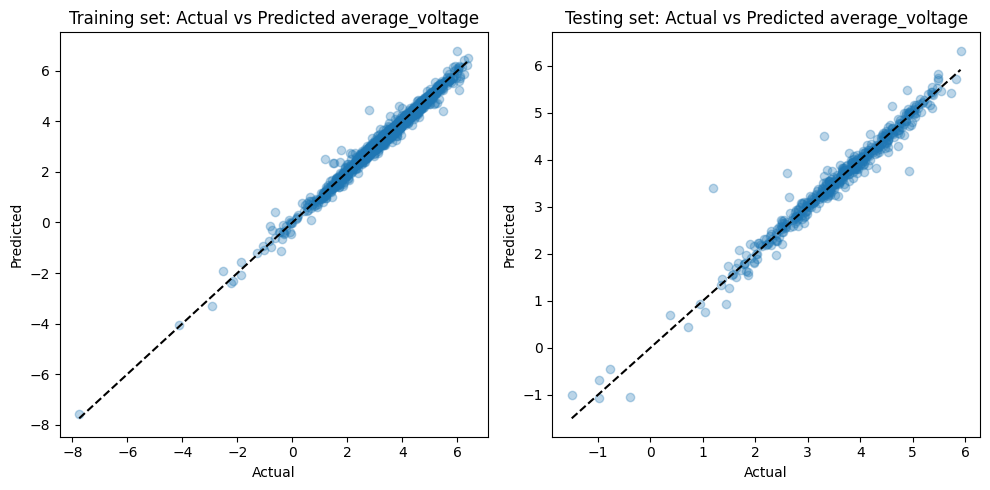

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

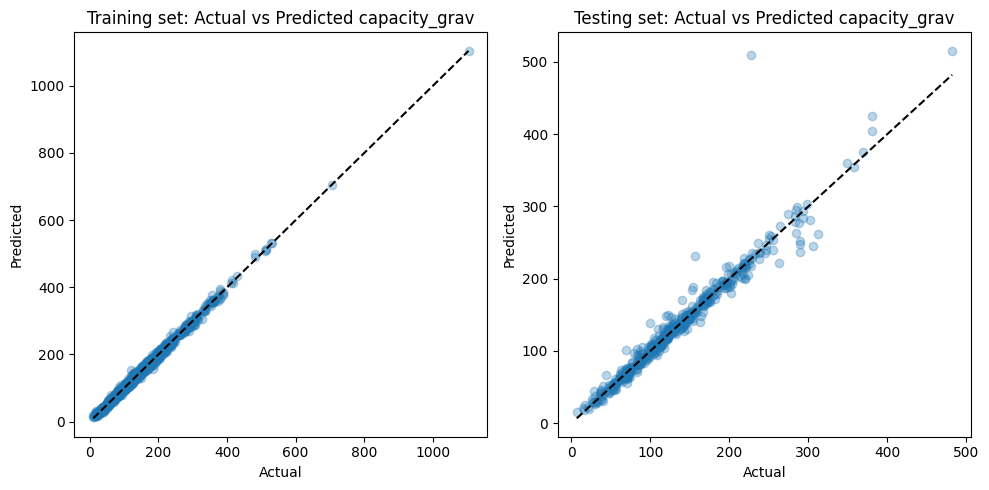

            Target  Train MAE  Test MAE  Train MSE    Test MSE  Train RMSE  \
0  average_voltage   0.090534  0.113991   0.021043    0.039176    0.145060   
1    capacity_grav   3.770909  7.055108  26.089321  278.924086    5.107771   

   Test RMSE  Train R2 Score  Test R2 Score  
0    0.19793        0.986075       0.965684  
1   16.70102        0.995883       0.940373  

Cross validation results for average_voltage:
Train R2 Score: 0.9844593689981931
Test R2 Score: 0.9482548921651597
Train MSE: 0.023381256419409156
Test MSE: 0.07826608196671622
Train MAE: 0.09991882375225068
Test MAE: 0.14871532438367274

Cross validation results for capacity_grav:
Train R2 Score: 0.9958288406009105
Test R2 Score: 0.9596333968546663
Train MSE: 26.33488931870944
Test MSE: 256.2718513661483
Train MAE: 3.7440568150562683
Test MAE: 7.7188102120084086


In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, target):
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.3)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Training set: Actual vs Predicted {target}')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Testing set: Actual vs Predicted {target}')

    plt.tight_layout()
    plt.show()
from sklearn.model_selection import cross_validate

def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, target, model):
    metrics = {'Target': target,
               'Train MAE': mean_absolute_error(y_train, y_train_pred),
               'Test MAE': mean_absolute_error(y_test, y_test_pred),
               'Train MSE': mean_squared_error(y_train, y_train_pred),
               'Test MSE': mean_squared_error(y_test, y_test_pred),
               'Train RMSE': mean_squared_error(y_train, y_train_pred, squared=False),
               'Test RMSE': mean_squared_error(y_test, y_test_pred, squared=False),
               'Train R2 Score': r2_score(y_train, y_train_pred),
               'Test R2 Score': r2_score(y_test, y_test_pred)}
    return metrics

def cross_validate_model(model, X, y):
    scores = cross_validate(model, X, y, cv=5,
                            scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
                            return_train_score=True)
    return scores
# Making predictions on the training data
y1_train_pred = model_1.predict(X_train)
y2_train_pred = model_2.predict(X_train)

# Get model performance metrics and cross validation results
results = []
cross_val_results = []
for model, y_train, y_train_pred, y_test, y_test_pred, target in zip([model_1, model_2],
                                                                      [y1_train, y2_train],
                                                                      [y1_train_pred, y2_train_pred],
                                                                      [y1_test, y2_test],
                                                                      [y1_pred, y2_pred],
                                                                      ["average_voltage", "capacity_grav"]):
    results.append(evaluate_model(y_train, y_train_pred, y_test, y_test_pred, target, model))
    cross_val_results.append(cross_validate_model(model, X_train, y_train))
    plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, target)

# Print model performance metrics
df_results = pd.DataFrame(results)
print(df_results)

# Print cross validation results
for target, cv_result in zip(["average_voltage", "capacity_grav"], cross_val_results):
    print(f"\nCross validation results for {target}:")
    df_cv_results = pd.DataFrame(cv_result)
    df_cv_results.rename(columns={'test_r2': 'Test R2 Score', 'train_r2': 'Train R2 Score',
                                  'test_neg_mean_squared_error': 'Test MSE',
                                  'train_neg_mean_squared_error': 'Train MSE',
                                  'test_neg_mean_absolute_error': 'Test MAE',
                                  'train_neg_mean_absolute_error': 'Train MAE'},
                         inplace=True)
    df_cv_results['Train MSE'] = -df_cv_results['Train MSE']
    df_cv_results['Test MSE'] = -df_cv_results['Test MSE']
    df_cv_results['Train MAE'] = -df_cv_results['Train MAE']
    df_cv_results['Test MAE'] = -df_cv_results['Test MAE']
    display(df_cv_results)



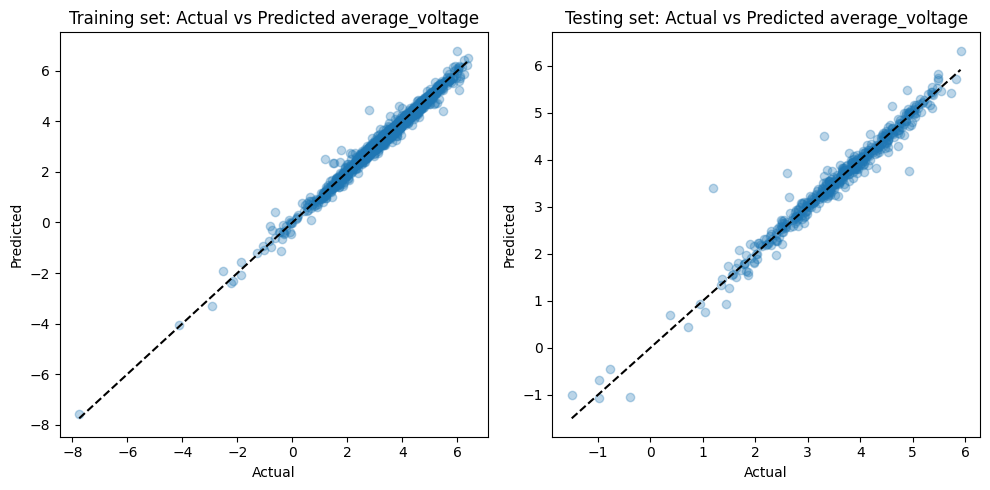

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

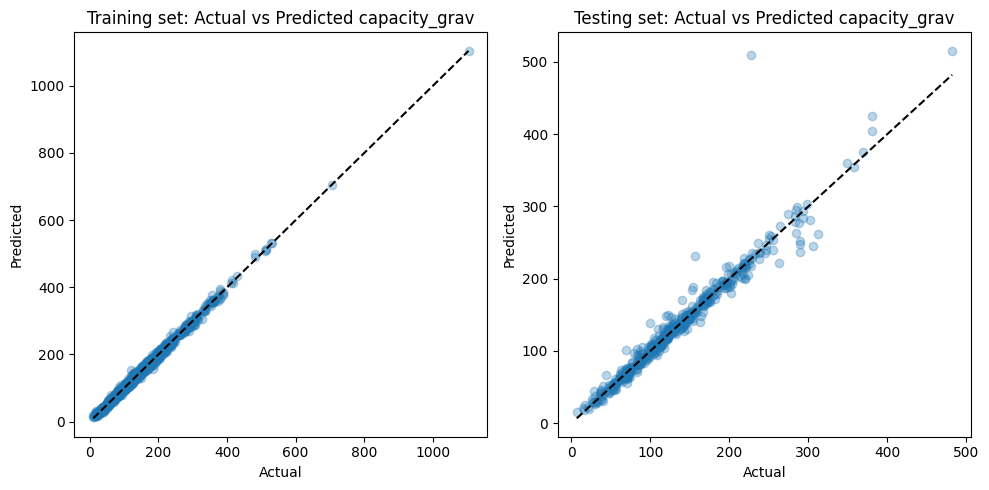

            Target  Train MAE  Test MAE  Train MSE    Test MSE  Train RMSE  \
0  average_voltage   0.090534  0.113991   0.021043    0.039176    0.145060   
1    capacity_grav   3.770909  7.055108  26.089321  278.924086    5.107771   

   Test RMSE  Train R2 Score  Test R2 Score  
0    0.19793        0.986075       0.965684  
1   16.70102        0.995883       0.940373  

Cross validation results for average_voltage:


,fit_time,score_time,Test R2 Score,Train R2 Score,Test MSE,Train MSE,Test MAE,Train MAE,Test RMSE,Train RMSE
0,6.547486,0.002237,0.957479,0.983000,0.078670,0.024220,0.142275,0.096880,0.280482,0.155629
1,2.897212,0.005347,0.943549,0.986435,0.068499,0.021502,0.156244,0.100404,0.261723,0.146636
2,1.557631,0.002185,0.966301,0.984468,0.048553,0.023630,0.131961,0.097706,0.220348,0.153719
3,5.122693,0.002174,0.954882,0.986651,0.060720,0.020714,0.135749,0.094332,0.246414,0.143922
4,3.193140,0.002200,0.919063,0.981743,0.134889,0.026841,0.177348,0.110272,0.367272,0.163831



Cross validation results for capacity_grav:


,fit_time,score_time,Test R2 Score,Train R2 Score,Test MSE,Train MSE,Test MAE,Train MAE,Test RMSE,Train RMSE
0,8.812686,0.003018,0.969772,0.996717,190.492833,20.828797,7.300198,3.367484,13.801914,4.563858
1,7.610535,0.002879,0.957022,0.995334,373.723064,26.760879,7.958469,3.778237,19.331918,5.173092
2,14.301224,0.004401,0.952404,0.995973,231.853601,26.954265,7.779495,3.738143,15.226740,5.191750
3,9.201019,0.002957,0.972170,0.996421,152.372339,23.444894,7.193194,3.553024,12.343919,4.841993
4,9.188632,0.002171,0.946801,0.994699,332.917420,33.685611,8.362694,4.283397,18.246025,5.803931


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

def plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, target):
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.3)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Training set: Actual vs Predicted {target}')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Testing set: Actual vs Predicted {target}')

    plt.tight_layout()
    plt.show()

def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, target, model):
    metrics = {'Target': target,
               'Train MAE': mean_absolute_error(y_train, y_train_pred),
               'Test MAE': mean_absolute_error(y_test, y_test_pred),
               'Train MSE': mean_squared_error(y_train, y_train_pred),
               'Test MSE': mean_squared_error(y_test, y_test_pred),
               'Train RMSE': mean_squared_error(y_train, y_train_pred, squared=False),
               'Test RMSE': mean_squared_error(y_test, y_test_pred, squared=False),
               'Train R2 Score': r2_score(y_train, y_train_pred),
               'Test R2 Score': r2_score(y_test, y_test_pred)}
    return metrics

def cross_validate_model(model, X, y):
    scores = cross_validate(model, X, y, cv=5,
                            scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'),
                            return_train_score=True)
    return scores

# Making predictions on the training data
y1_train_pred = model_1.predict(X_train)
y2_train_pred = model_2.predict(X_train)

# Get model performance metrics and cross validation results
results = []
cross_val_results = []
for model, y_train, y_train_pred, y_test, y_test_pred, target in zip([model_1, model_2],
                                                                      [y1_train, y2_train],
                                                                      [y1_train_pred, y2_train_pred],
                                                                      [y1_test, y2_test],
                                                                      [y1_pred, y2_pred],
                                                                      ["average_voltage", "capacity_grav"]):
    results.append(evaluate_model(y_train, y_train_pred, y_test, y_test_pred, target, model))
    cross_val_results.append(cross_validate_model(model, X_train, y_train))
    plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, target)

# Print model performance metrics
df_results = pd.DataFrame(results)
print(df_results)

# Print cross validation results
for target, cv_result in zip(["average_voltage", "capacity_grav"], cross_val_results):
    print(f"\nCross validation results for {target}:")
    df_cv_results = pd.DataFrame(cv_result)
    df_cv_results.rename(columns={'test_r2': 'Test R2 Score', 'train_r2': 'Train R2 Score',
                                  'test_neg_mean_squared_error': 'Test MSE',
                                  'train_neg_mean_squared_error': 'Train MSE',
                                  'test_neg_mean_absolute_error': 'Test MAE',
                                  'train_neg_mean_absolute_error': 'Train MAE',
                                  'test_neg_root_mean_squared_error': 'Test RMSE',
                                  'train_neg_root_mean_squared_error': 'Train RMSE'},
                         inplace=True)
    df_cv_results['Train MSE'] = -df_cv_results['Train MSE']
    df_cv_results['Test MSE'] = -df_cv_results['Test MSE']
    df_cv_results['Train MAE'] = -df_cv_results['Train MAE']
    df_cv_results['Test MAE'] = -df_cv_results['Test MAE']
    df_cv_results['Train RMSE'] = -df_cv_results['Train RMSE']
    df_cv_results['Test RMSE'] = -df_cv_results['Test RMSE']
    display(df_cv_results)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


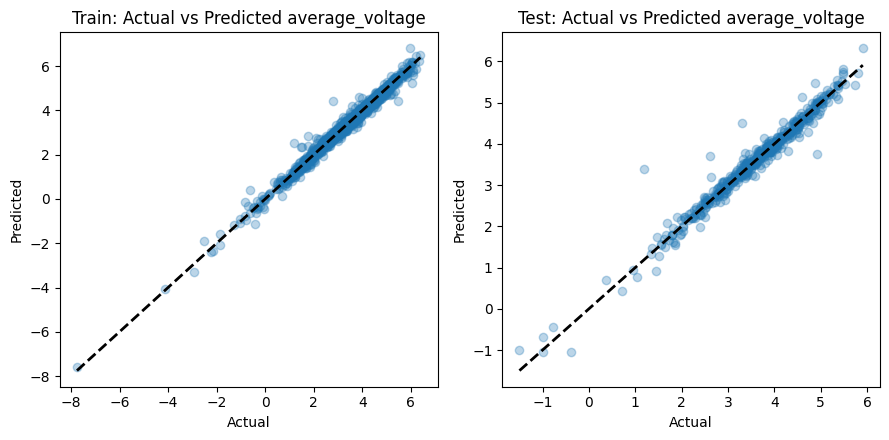

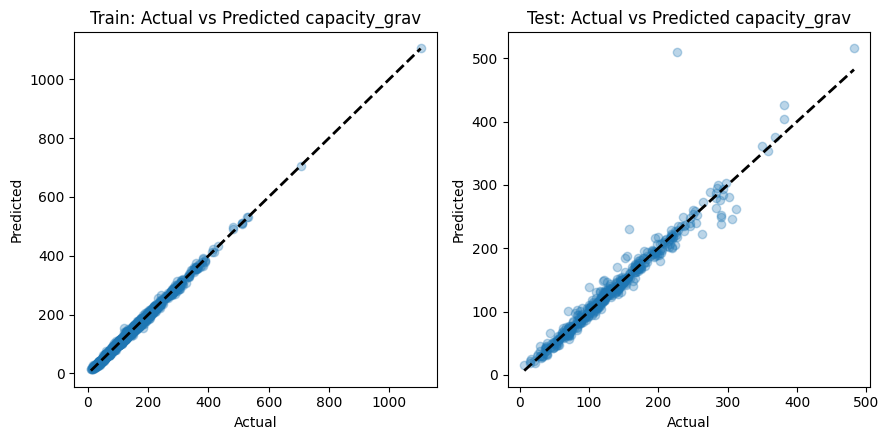

            Target  Train MAE  Test MAE  Train MSE    Test MSE  Train RMSE  \
0  average_voltage   0.090534  0.113991   0.021043    0.039176    0.145060   
1    capacity_grav   3.770909  7.055108  26.089321  278.924086    5.107771   

   Test RMSE  Train R2 Score  Test R2 Score  
0    0.19793        0.986075       0.965684  
1   16.70102        0.995883       0.940373  


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Set global params
plt.rcParams['font.size'] = 10 # Set the font size
plt.rcParams['lines.linewidth'] = 2 # Set the line width

def plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, target):
    plt.figure(figsize=(9,4.5)) # Increase the figure size

    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.3)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Train: Actual vs Predicted {target}')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Test: Actual vs Predicted {target}')

    plt.tight_layout()
    plt.savefig(f"{target}_vs_predicted.png", dpi=300) # Save the figure with higher resolution
    plt.show()

# Your other functions...
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, target, model):
    metrics = {'Target': target,
               'Train MAE': mean_absolute_error(y_train, y_train_pred),
               'Test MAE': mean_absolute_error(y_test, y_test_pred),
               'Train MSE': mean_squared_error(y_train, y_train_pred),
               'Test MSE': mean_squared_error(y_test, y_test_pred),
               'Train RMSE': mean_squared_error(y_train, y_train_pred, squared=False),
               'Test RMSE': mean_squared_error(y_test, y_test_pred, squared=False),
               'Train R2 Score': r2_score(y_train, y_train_pred),
               'Test R2 Score': r2_score(y_test, y_test_pred)}
    return metrics
# The remaining parts of your code...
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y1 = df['average_voltage']
y2 = df['capacity_grav']

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Making predictions on the training data

model_1 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20)
model_2 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(14,7), max_iter=4000, solver='lbfgs', alpha=0.01, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20)

# Training the models
model_1.fit(X_train, y1_train)
model_2.fit(X_train, y2_train)

# Making predictions on the testing data
y1_pred = model_1.predict(X_test)
y2_pred = model_2.predict(X_test)

y1_train_pred = model_1.predict(X_train)
y2_train_pred = model_2.predict(X_train)

# Get model performance metrics and cross validation results
results = []

for model, y_train, y_train_pred, y_test, y_test_pred, target in zip([model_1, model_2],
                                                                      [y1_train, y2_train],
                                                                      [y1_train_pred, y2_train_pred],
                                                                      [y1_test, y2_test],
                                                                      [y1_pred, y2_pred],
                                                                      ["average_voltage", "capacity_grav"]):
    results.append(evaluate_model(y_train, y_train_pred, y_test, y_test_pred, target, model))
    plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, target)

# Print model performance metrics
df_results = pd.DataFrame(results)
print(df_results)


In [ ]:
# Print the first 5 actual and predicted values
for y_train, y_train_pred, y_test, y_test_pred, target in zip([y1_train, y2_train],
                                                              [y1_train_pred, y2_train_pred],
                                                              [y1_test, y2_test],
                                                              [y1_pred, y2_pred],
                                                              ["average_voltage", "capacity_grav"]):
    print(f"\nActual vs Predicted {target} for Training Set:")
    for actual, predicted in zip(y_train[:5], y_train_pred[:5]):
        print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

    print(f"\nActual vs Predicted {target} for Testing Set:")
    for actual, predicted in zip(y_test[:5], y_test_pred[:5]):
        print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")



Actual vs Predicted average_voltage for Training Set:
Actual: 1.19, Predicted: 1.21
Actual: 3.92, Predicted: 3.89
Actual: 3.12, Predicted: 3.08
Actual: 4.41, Predicted: 4.35
Actual: 3.69, Predicted: 3.70

Actual vs Predicted average_voltage for Testing Set:
Actual: 4.15, Predicted: 4.20
Actual: 4.35, Predicted: 4.29
Actual: 1.63, Predicted: 1.69
Actual: 2.55, Predicted: 2.72
Actual: 3.16, Predicted: 2.98

Actual vs Predicted capacity_grav for Training Set:
Actual: 80.58, Predicted: 76.70
Actual: 35.54, Predicted: 38.25
Actual: 171.00, Predicted: 170.53
Actual: 119.27, Predicted: 118.72
Actual: 358.24, Predicted: 361.10

Actual vs Predicted capacity_grav for Testing Set:
Actual: 228.35, Predicted: 228.58
Actual: 175.32, Predicted: 168.89
Actual: 203.43, Predicted: 192.02
Actual: 238.55, Predicted: 237.32
Actual: 132.66, Predicted: 125.88


Streaming output truncated to the last 5000 lines.
Iteration 3501, loss = 0.01514168
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 3502, loss = 0.01523580
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 3503, loss = 0.01519881
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 3504, loss = 0.01518923
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 3505, loss = 0.01520131
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 3506, loss = 0.01515548
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 3507, loss = 0.01517555
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 3508, loss = 0.01519402
Training loss did not improve more than tol=0.0

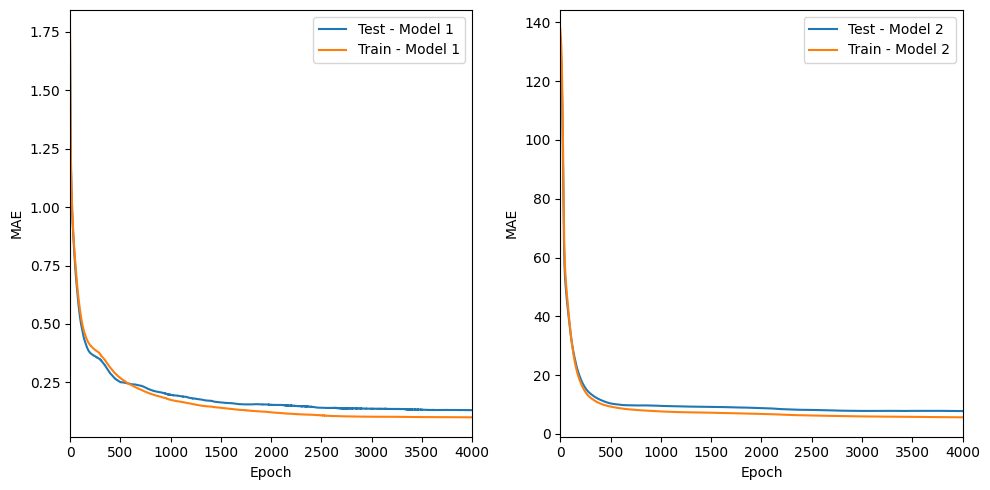

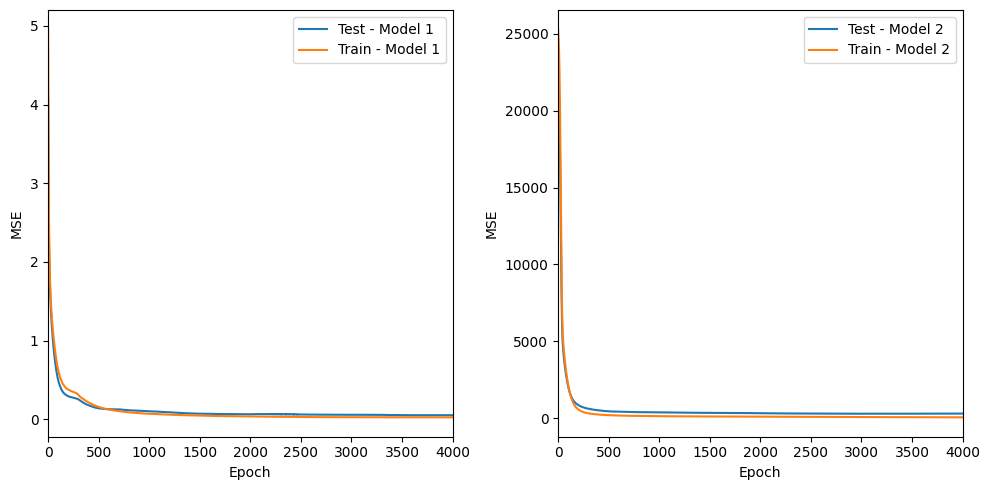

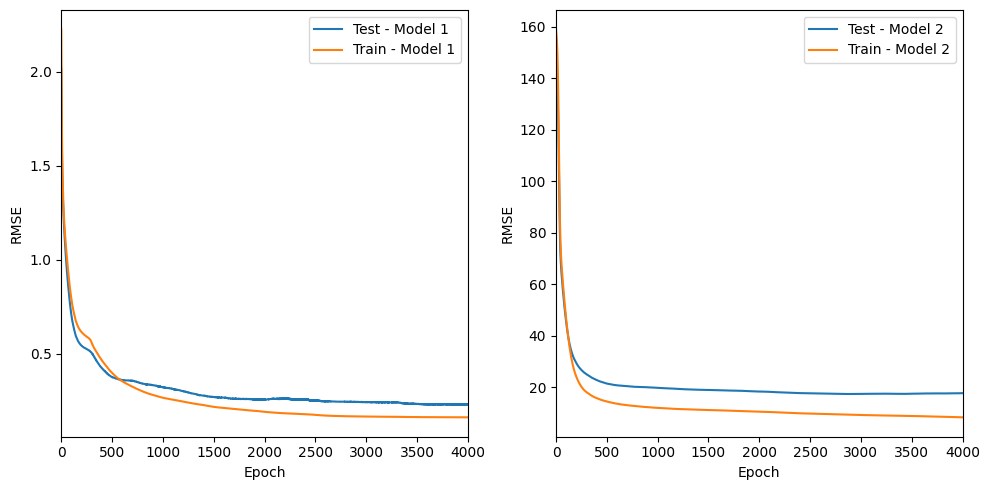

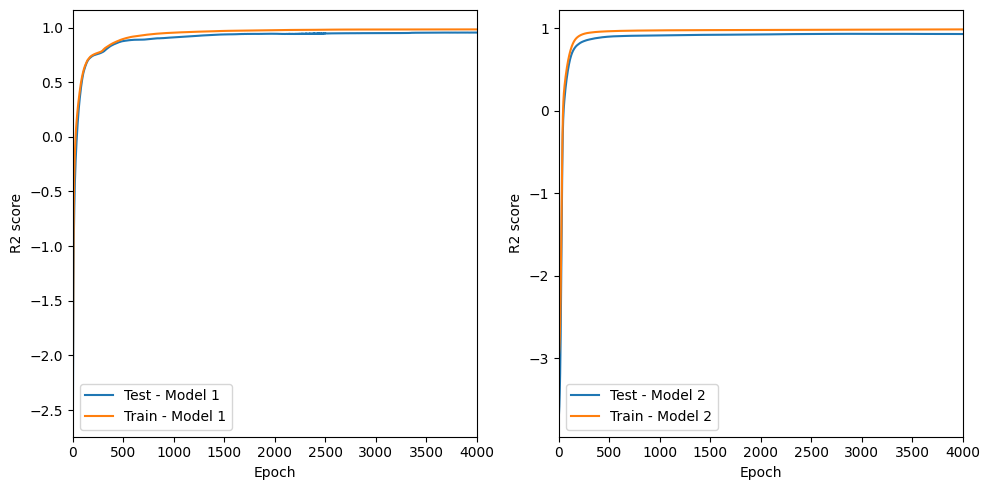

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the MLPRegressor models with best hyperparameters
model_1 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=4000, solver='adam', alpha=0.01, verbose=True)
model_2 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(14, 7), max_iter=4000, solver='adam', alpha=0.01, verbose=True)

# Split the data into train and test sets for both models
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Scale the data for both models
scaler_1 = StandardScaler()
X_train = scaler_1.fit_transform(X_train)
X_test = scaler_1.transform(X_test)


# Initialize lists to store the metrics for both models
train_loss_1, train_mae_list_1, train_mse_list_1, train_rmse_list_1, train_r2_list_1 = [], [], [], [], []
test_mae_list_1, test_mse_list_1, test_rmse_list_1, test_r2_list_1 = [], [], [], []

train_loss_2, train_mae_list_2, train_mse_list_2, train_rmse_list_2, train_r2_list_2 = [], [], [], [], []
test_mae_list_2, test_mse_list_2, test_rmse_list_2, test_r2_list_2 = [], [], [], []

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, train_loss, train_mae_list, train_mse_list, train_rmse_list, train_r2_list, test_mae_list, test_mse_list, test_rmse_list, test_r2_list):
    for i in range(model.max_iter):
        # Train the model for one epoch
        model.partial_fit(X_train, y_train)

        # Compute the training loss
        train_loss.append(model.loss_)

        # Make predictions on the training data
        y_train_pred = model.predict(X_train)

        # Evaluate the performance of the model on the training data
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
        train_r2 = r2_score(y_train, y_train_pred)

        # Store the training metrics
        train_mae_list.append(train_mae)
        train_mse_list.append(train_mse)
        train_rmse_list.append(train_rmse)
        train_r2_list.append(train_r2)

        # Make predictions on the testing data
        y_test_pred = model.predict(X_test)

        # Evaluate the performance of the model on the testing data
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        test_r2 = r2_score(y_test, y_test_pred)

        # Store the testing metrics
        test_mae_list.append(test_mae)
        test_mse_list.append(test_mse)
        test_rmse_list.append(test_rmse)
        test_r2_list.append(test_r2)

train_and_evaluate(model_1, X_train, y1_train, X_test, y1_test, train_loss_1, train_mae_list_1, train_mse_list_1, train_rmse_list_1, train_r2_list_1, test_mae_list_1, test_mse_list_1, test_rmse_list_1, test_r2_list_1)
train_and_evaluate(model_2, X_train, y2_train, X_test, y2_test, train_loss_2, train_mae_list_2, train_mse_list_2, train_rmse_list_2, train_r2_list_2, test_mae_list_2, test_mse_list_2, test_rmse_list_2, test_r2_list_2)

# Plot the performance of the models
metrics = ['MAE', 'MSE', 'RMSE', 'R2 score']
train_lists_1 = [train_mae_list_1, train_mse_list_1, train_rmse_list_1, train_r2_list_1]
test_lists_1 = [test_mae_list_1, test_mse_list_1, test_rmse_list_1, test_r2_list_1]

train_lists_2 = [train_mae_list_2, train_mse_list_2, train_rmse_list_2, train_r2_list_2]
test_lists_2 = [test_mae_list_2, test_mse_list_2, test_rmse_list_2, test_r2_list_2]

for metric, train_list_1, test_list_1, train_list_2, test_list_2 in zip(metrics, train_lists_1, test_lists_1, train_lists_2, test_lists_2):
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.plot(test_list_1, label='Test - Model 1')
    plt.plot(train_list_1, label='Train - Model 1')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.xlim([0, 4000])

    plt.subplot(1, 2, 2)
    plt.plot(test_list_2, label='Test - Model 2')
    plt.plot(train_list_2, label='Train - Model 2')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.xlim([0, 4000])

    plt.tight_layout()
    plt.show()


Making Predictions on new dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load new dataset
df_new = pd.read_csv('Novel160.csv')

# Extract the features from the new dataset
X_new = df_new[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low',  'efermi_low']]

# Apply the same scaling to the new data
X_new = scaler.transform(X_new)

# Use the trained models to make predictions
predicted_voltage = model_1.predict(X_new)
predicted_capacity = model_2.predict(X_new)

# Add the predictions as new columns in the original DataFrame
df_new['predicted_average_voltage'] = predicted_voltage
df_new['predicted_capacity_grav'] = predicted_capacity

# Save the DataFrame to a new csv file
df_new.to_csv('Novel160_with_predictions.csv', index=False)


MAE vs Epochs

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

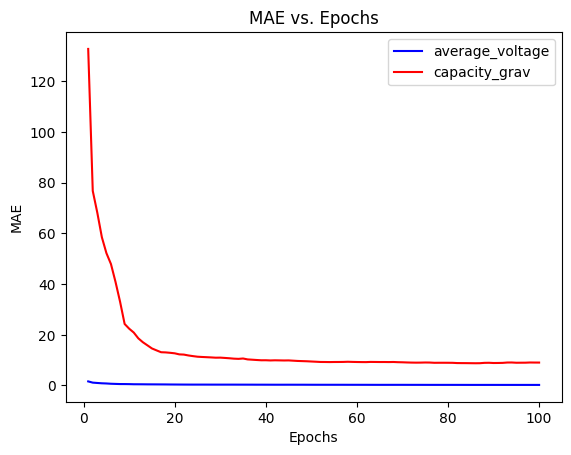

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Initialize lists to store MAE values for each epoch
mae_history_1 = []
mae_history_2 = []

# Define the number of epochs
epochs = range(1, 101)  # Change this to desired number of epochs

for epoch in epochs:
    # Initialize the models with current epoch number
    model_1 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=epoch, solver='lbfgs', alpha=0.1, early_stopping=False)
    model_2 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(14, 7), max_iter=epoch, solver='lbfgs', alpha=0.1, early_stopping=False)

    # Train the models
    model_1.fit(X_train, y1_train)
    model_2.fit(X_train, y2_train)

    # Make predictions
    y1_pred = model_1.predict(X_test)
    y2_pred = model_2.predict(X_test)

    # Calculate and store the MAE
    mae_history_1.append(mean_absolute_error(y1_test, y1_pred))
    mae_history_2.append(mean_absolute_error(y2_test, y2_pred))

# Plot the results
plt.plot(epochs, mae_history_1, 'b', label='average_voltage')
plt.plot(epochs, mae_history_2, 'r', label='capacity_grav')
plt.title('MAE vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

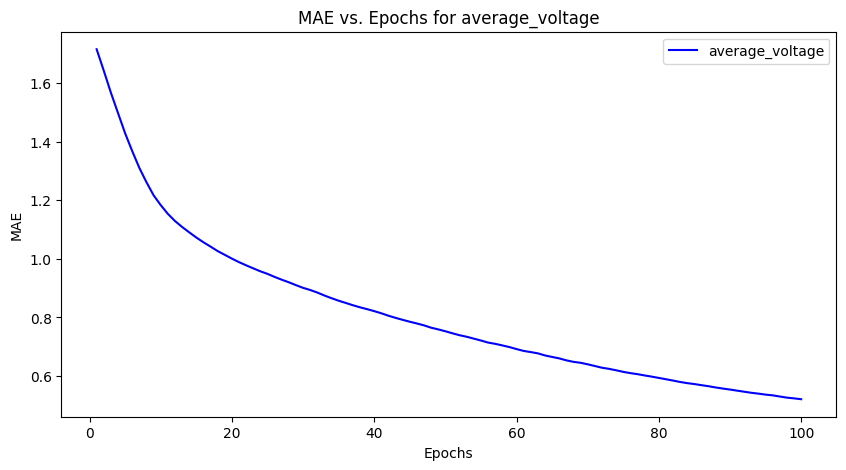

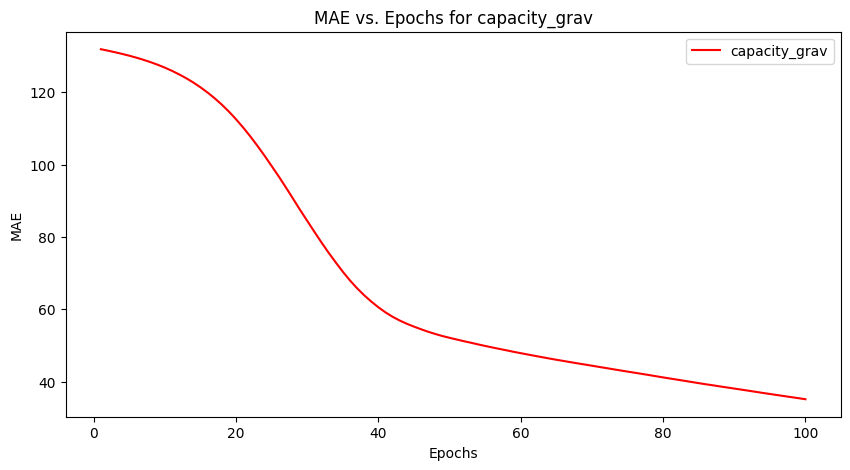

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Initialize lists to store MAE values for each epoch
mae_history_1 = []
mae_history_2 = []

# Define the number of epochs
epochs = range(1, 400)  # Change this to desired number of epochs

for epoch in epochs:
    # Initialize the models with current epoch number
    model_1 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=epoch, solver='adam', alpha=0.01, early_stopping=False)
    model_2 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(14, 7), max_iter=epoch, solver='adam', alpha=0.01, early_stopping=False)

    # Train the models
    model_1.fit(X_train, y1_train)
    model_2.fit(X_train, y2_train)

    # Make predictions
    y1_pred = model_1.predict(X_test)
    y2_pred = model_2.predict(X_test)

    # Calculate and store the MAE
    mae_history_1.append(mean_absolute_error(y1_test, y1_pred))
    mae_history_2.append(mean_absolute_error(y2_test, y2_pred))

# Plot the results for average_voltage
plt.figure(figsize=(10, 5))
plt.plot(epochs, mae_history_1, 'b', label='average_voltage')
plt.title('MAE vs. Epochs for average_voltage')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot the results for capacity_grav
plt.figure(figsize=(10, 5))
plt.plot(epochs, mae_history_2, 'r', label='capacity_grav')
plt.title('MAE vs. Epochs for capacity_grav')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_i

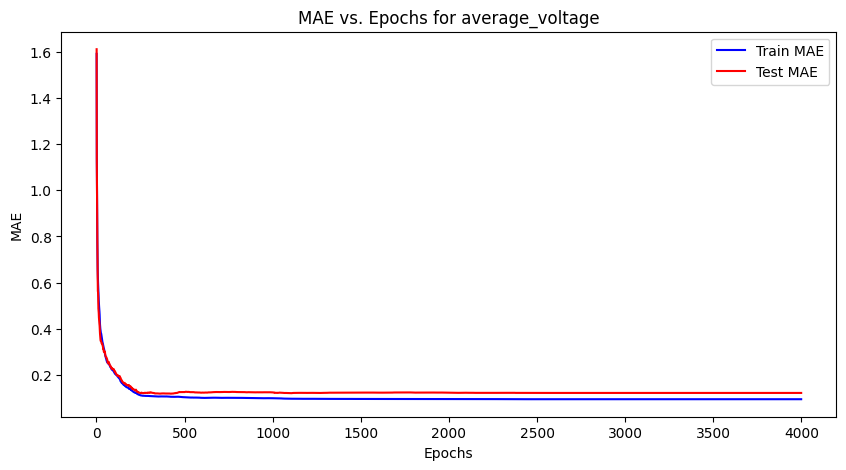

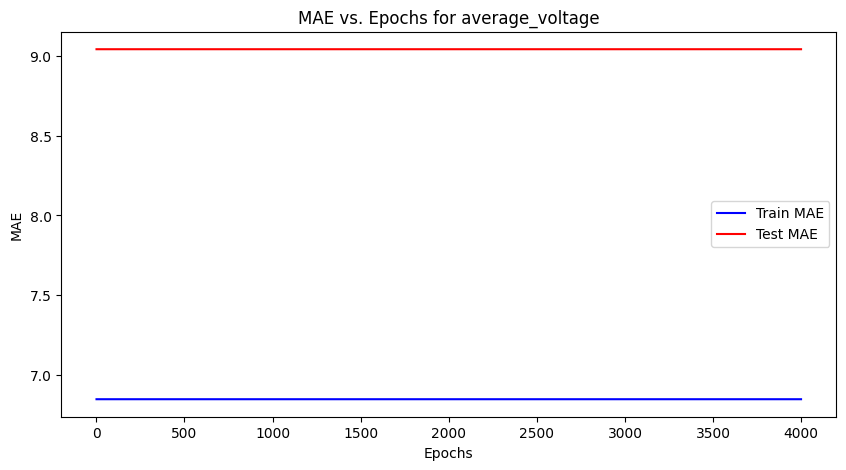

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize lists to store metrics for each epoch
train_mae_history_1, train_mse_history_1, train_rmse_history_1, train_r2_history_1 = [], [], [], []
test_mae_history_1, test_mse_history_1, test_rmse_history_1, test_r2_history_1 = [], [], [], []
# (Do the same for model_2)
train_mae_history_2, train_mse_history_2, train_rmse_history_2, train_r2_history_2 = [], [], [], []
test_mae_history_2, test_mse_history_2, test_rmse_history_2, test_r2_history_2 = [], [], [], []

# Define the number of epochs
epochs = range(1, 4000)  # Change this to desired number of epochs

for epoch in epochs:
    # Initialize the models with current epoch number
    model_1 = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(10,), max_iter=epoch, solver='lbfgs', alpha=0.1, early_stopping=False)
    # (Do the same for model_2)

    # Train the models
    model_1.fit(X_train, y1_train)
    # (Do the same for model_2)
    model_2.fit(X_train, y2_train)
    # Make predictions
    y1_train_pred = model_1.predict(X_train)
    y1_test_pred = model_1.predict(X_test)
    # (Do the same for model_2)
    y2_train_pred = model_2.predict(X_train)
    y2_test_pred = model_2.predict(X_test)
    # Calculate and store the metrics
    train_mae_history_1.append(mean_absolute_error(y1_train, y1_train_pred))
    train_mse_history_1.append(mean_squared_error(y1_train, y1_train_pred))
    train_rmse_history_1.append(mean_squared_error(y1_train, y1_train_pred, squared=False))
    train_r2_history_1.append(r2_score(y1_train, y1_train_pred))

    test_mae_history_1.append(mean_absolute_error(y1_test, y1_test_pred))
    test_mse_history_1.append(mean_squared_error(y1_test, y1_test_pred))
    test_rmse_history_1.append(mean_squared_error(y1_test, y1_test_pred, squared=False))
    test_r2_history_1.append(r2_score(y1_test, y1_test_pred))
    # (Do the same for model_2)
    train_mae_history_2.append(mean_absolute_error(y2_train, y2_train_pred))
    train_mse_history_2.append(mean_squared_error(y2_train, y2_train_pred))
    train_rmse_history_2.append(mean_squared_error(y2_train, y2_train_pred, squared=False))
    train_r2_history_2.append(r2_score(y2_train, y2_train_pred))

    test_mae_history_2.append(mean_absolute_error(y2_test, y2_test_pred))
    test_mse_history_2.append(mean_squared_error(y2_test, y2_test_pred))
    test_rmse_history_2.append(mean_squared_error(y2_test, y2_test_pred, squared=False))
    test_r2_history_2.append(r2_score(y2_test, y2_test_pred))

# Plot the results for average_voltage
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_mae_history_1, 'b', label='Train MAE')
plt.plot(epochs, test_mae_history_1, 'r', label='Test MAE')
plt.title('MAE vs. Epochs for average_voltage')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()
# (Repeat for other metrics and for model_2)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_mae_history_2, 'b', label='Train MAE')
plt.plot(epochs, test_mae_history_2, 'r', label='Test MAE')
plt.title('MAE vs. Epochs for average_voltage')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Iteration 1, loss = 12809.18573607
Iteration 2, loss = 12766.46656593
Iteration 3, loss = 12718.63635644
Iteration 4, loss = 12663.58882034
Iteration 5, loss = 12599.02425416
Iteration 6, loss = 12522.45620058
Iteration 7, loss = 12431.69461098
Iteration 8, loss = 12324.93196408
Iteration 9, loss = 12200.85083063
Iteration 10, loss = 12058.09657841
Iteration 11, loss = 11895.11380519
Iteration 12, loss = 11710.81372142
Iteration 13, loss = 11503.90488421
Iteration 14, loss = 11273.01757051
Iteration 15, loss = 11017.25162190
Iteration 16, loss = 10736.81018136
Iteration 17, loss = 10432.60619611
Iteration 18, loss = 10105.53078491
Iteration 19, loss = 9756.90459433
Iteration 20, loss = 9388.13603963
Iteration 21, loss = 9000.46201048
Iteration 22, loss = 8596.07768725
Iteration 23, loss = 8179.09821779
Iteration 24, loss = 7754.71885736
Iteration 25, loss = 7327.57801096
Iteration 26, loss = 6901.69012311
Iteration 27, loss = 6481.25701212
Iteration 28, loss = 6070.29265497
Iteration 2

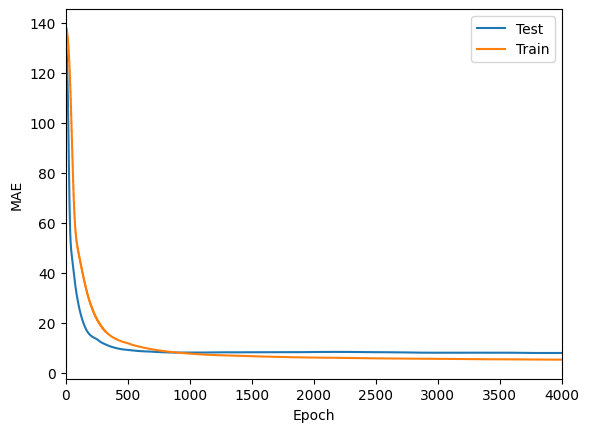

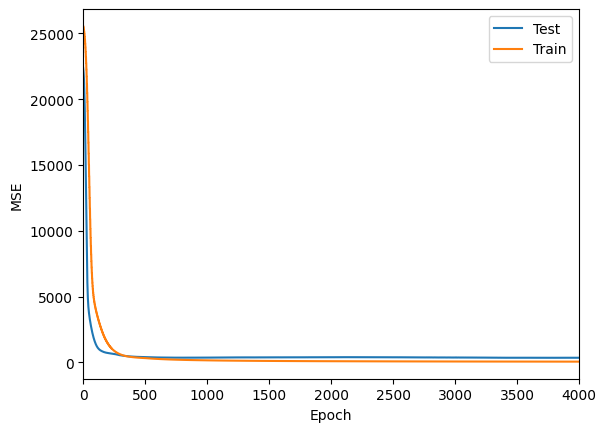

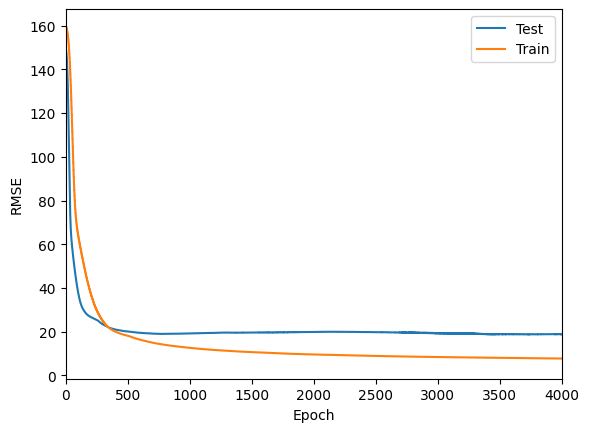

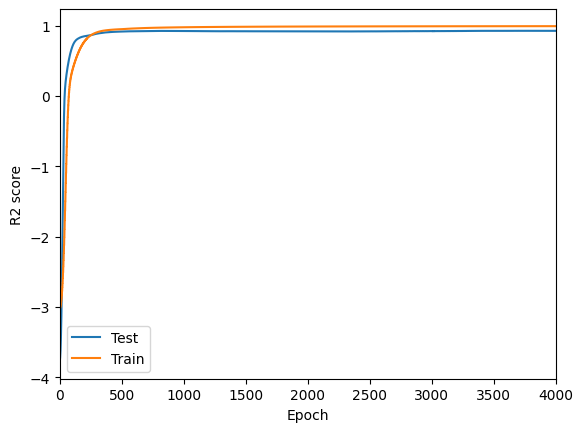

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('Modified_Battery_data.csv')
X = df[[ 'fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'energy_above_hull_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low', 'energy_above_hull_low', 'efermi_low']]
y = df['capacity_grav']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPRegressor model with best hyperparameters# this is for capacity prediction model
model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(20,10), max_iter=4000, solver='adam', alpha=0.01, verbose=True)
#'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'max_iter': 4000, 'n_iter_no_change': 20, 'solver': 'adam', 'validation_fraction': 0.1}
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store the metrics
train_loss = []
train_mae_list = []
train_mse_list = []
train_rmse_list = []
train_r2_list = []

test_mae_list = []
test_mse_list = []
test_rmse_list = []
test_r2_list = []

# Train the model for each epoch
for i in range(model.max_iter):
    # Train the model for one epoch
    model.partial_fit(X_train, y_train)

    # Compute the training loss
    train_loss.append(model.loss_)

    # Make predictions on the training data
    y_train_pred = model.predict(X_train)

    # Evaluate the performance of the model on the training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)

    # Store the training metrics
    train_mae_list.append(train_mae)
    train_mse_list.append(train_mse)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2)

    # Make predictions on the testing data
    y_test_pred = model.predict(X_test)

    # Evaluate the performance of the model on the testing data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the testing metrics
    test_mae_list.append(test_mae)
    test_mse_list.append(test_mse)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)

    # Print the performance metrics on both train and test sets
    #print(f"Epoch {i}: Train MAE={train_mae:.4f}, Train MSE={train_mse:.4f}, Train RMSE={train_rmse:.4f}, Train R2={train_r2:.4f}; Test MAE={test_mae:.4f}, Test MSE={test_mse:.4f}, Test RMSE={test_rmse:.4f}, Test R2=={test_r2:.4f}")

    # Store the metrics for train set
    train_y_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_y_pred)
    train_mse = mean_squared_error(y_train, train_y_pred)
    train_rmse = mean_squared_error(y_train, train_y_pred, squared=False)
    train_r2 = r2_score(y_train, train_y_pred)
    train_mae_list.append(train_mae)
    train_mse_list.append(train_mse)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2)

#Plot MAE versus epochs for train and test sets
plt.plot(test_mae_list, label='Test')
plt.plot(train_mae_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.xlim([0, 4000])
plt.show()

#Plot MSE versus epochs for train and test sets
plt.plot(test_mse_list, label='Test')
plt.plot(train_mse_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.xlim([0, 4000])
plt.show()

#Plot RMSE versus epochs for train and test sets
plt.plot(test_rmse_list, label='Test')
plt.plot(train_rmse_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.xlim([0, 4000])
plt.show()

#Plot R2 score versus epochs for train and test sets
plt.plot(test_r2_list, label='Test')
plt.plot(train_r2_list, label='Train')
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.legend()
plt.xlim([0, 4000])
plt.show()


Learning Curves (Score v/s CV (Training Size))

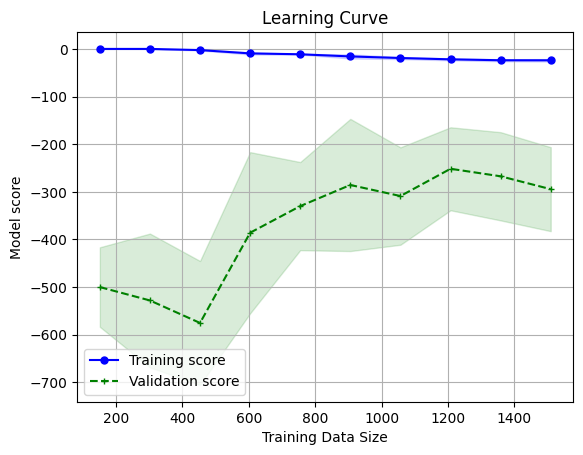

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

model = MLPRegressor(random_state=42, activation='relu', hidden_layer_sizes=(14, 7), max_iter=4000, solver='lbfgs', alpha=0.1, early_stopping=True, validation_fraction=0.2, n_iter_no_change=20)

# Use learning curve to get training and test scores along with train sizes
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y2_train,
                                                        cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model score')
plt.grid()
plt.legend(loc='best')
plt.show()


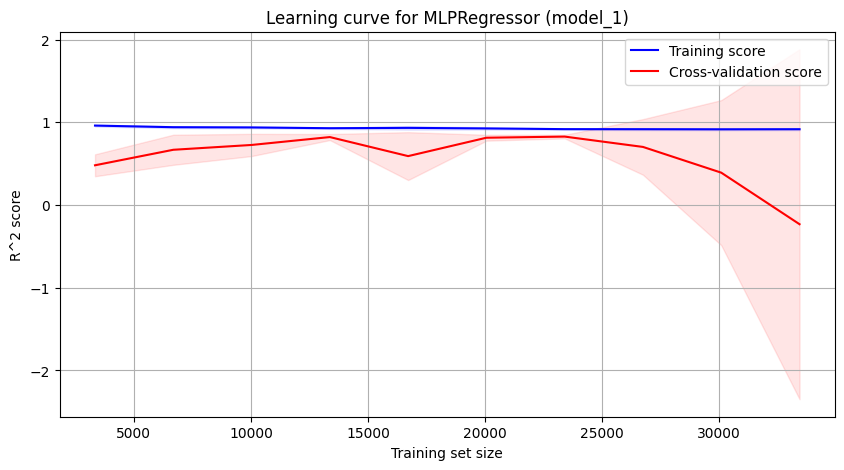

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline


# We'll generate learning curves for the first model
pipeline = make_pipeline(StandardScaler(), model_1)

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline,
                                                        X=X_train,
                                                        y=y1_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring="r2",  # use R^2 score as scoring metric
                                                        n_jobs=-1)

# calculate means of training and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# calculate standard deviation of training and test scores
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")

# plot the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.1)

plt.title("Learning curve for MLPRegressor (model_1)")
plt.xlabel("Training set size")
plt.ylabel("R^2 score")
plt.legend(loc="best")
plt.grid()
plt.show()


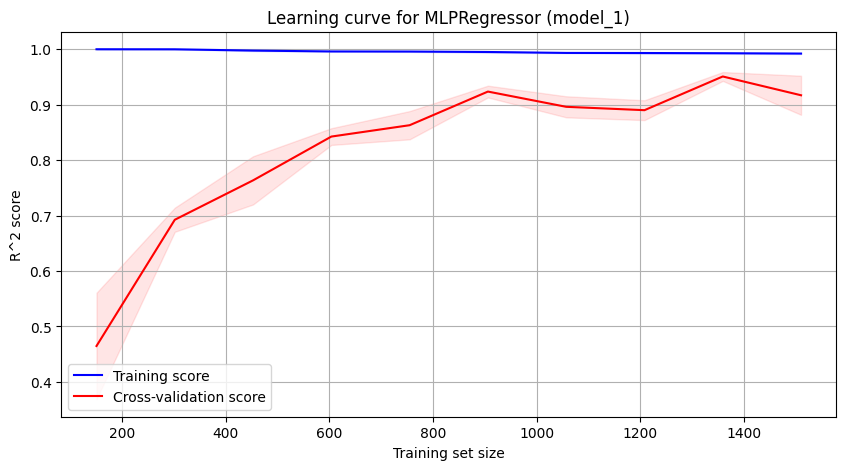

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline


# We'll generate learning curves for the first model
pipeline = make_pipeline(StandardScaler(), model_2)

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline,
                                                        X=X_train,
                                                        y=y1_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring="r2",  # use R^2 score as scoring metric
                                                        n_jobs=-1)

# calculate means of training and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# calculate standard deviation of training and test scores
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")

# plot the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.1)

plt.title("Learning curve for MLPRegressor (model_2)")
plt.xlabel("Training set size")
plt.ylabel("R^2 score")
plt.legend(loc="best")
plt.grid()
plt.show()


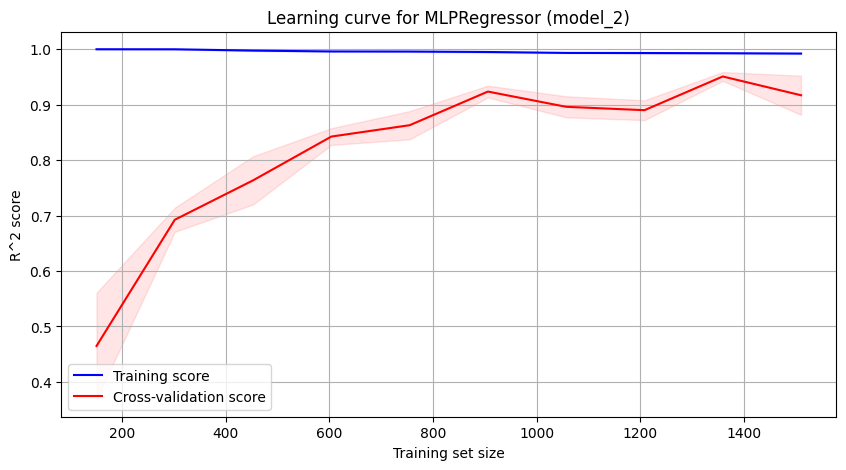

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")

# plot the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.1)

plt.title("Learning curve for MLPRegressor (model_2)")
plt.xlabel("Training set size")
plt.ylabel("R^2 score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
# Loading the new dataset
df_new = pd.read_csv('Modified_Battery_data.csv')
X_new = df_new[['fracA_charge', 'fracA_discharge', 'a_high', 'b_high', 'c_high', 'alpha_high', 'beta_high', 'gamma_high', 'nsites_high', 'nelements_high', 'density_high', 'formation_energy_per_atom_high', 'efermi_high','a_low', 'b_low', 'c_low', 'alpha_low', 'beta_low', 'gamma_low', 'nsites_low', 'nelements_low', 'density_low', 'formation_energy_per_atom_low',  'efermi_low']]
y1_new = df_new['average_voltage']
y2_new = df_new['capacity_grav']

# Scaling the new data with the same scaler used for the training data
X_new_scaled = scaler.transform(X_new)

# Using the trained models to make predictions on the new data
y1_new_pred = model_1.predict(X_new_scaled)
y2_new_pred = model_2.predict(X_new_scaled)

# Evaluating the performance of the models on the new data
evaluate_model(y1_new, y1_new_pred, "average_voltage", model_1)
evaluate_model(y2_new, y2_new_pred, "capacity_grav", model_2)



For average_voltage:
Mean Absolute Error: 0.23
Mean Squared Error: 0.13
Root Mean Squared Error: 0.36
R^2 Score: 0.91
Number of iterations: 1780

For capacity_grav:
Mean Absolute Error: 9.97
Mean Squared Error: 226.35
Root Mean Squared Error: 15.05
R^2 Score: 0.96
Number of iterations: 6686
